In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

<IPython.core.display.Javascript object>


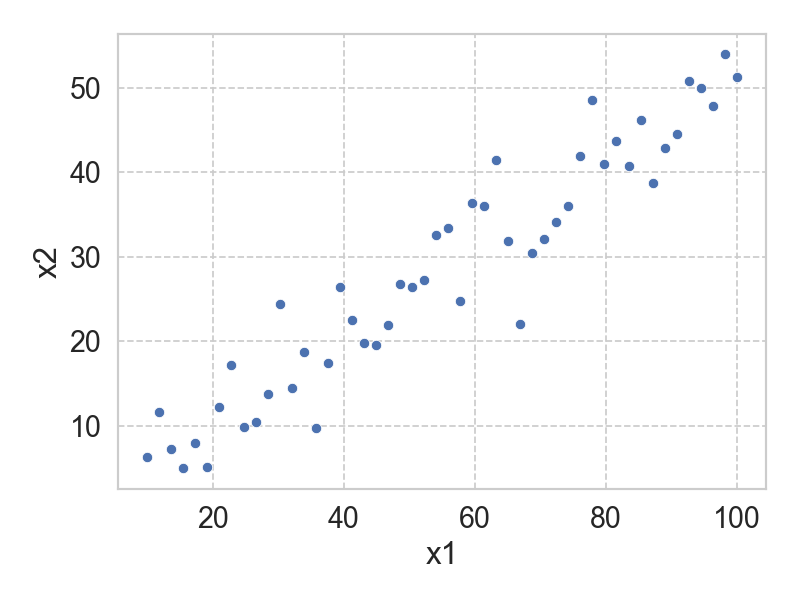

In [2]:
x1 = np.linspace(start=10, stop=100, num=50)
x2 = 0.5 * x1 + np.random.normal(scale=5, size=len(x1))

plt.figure()

sns.scatterplot(x=x1, y=x2)

plt.gca().set_xlabel("x1")
plt.gca().set_ylabel("x2")
plt.tight_layout()

In [3]:
# use the auto data as the example
from sklearn.preprocessing import StandardScaler

auto = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/lectures/lecture_3/auto_mpg.csv")
auto.dropna(inplace=True)  # for the sake of simplicity
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
# scale the input
X = auto[["displacement", "horsepower", "weight", "acceleration"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [5]:
# perform SVD
n = len(X_scaled)
U, S, Vh = np.linalg.svd(X_scaled.T @ X_scaled / n)

In [6]:
# calculate reconstruction error
all_errors = []
for k in range(1, len(U) + 1):
    U_reduced = U[:, :k]
    Z = X_scaled @ U_reduced
    X_approx = Z @ U_reduced.T
    error = (
        np.sum(np.square(np.linalg.norm((X_scaled - X_approx), ord=2, axis=1))) 
        / np.sum(np.square(np.linalg.norm(X_scaled, ord=2, axis=1)))
    )
    all_errors.append(error)

all_errors

[0.19776570529397033,
 0.03425025083897679,
 0.013511965150122119,
 2.021620486263589e-31]

In [7]:
for i in range(len(S)):
    print(1 - np.sum(S[:(i + 1)])/ np.sum(S))

0.1977657052939703
0.03425025083897659
0.013511965150122096
0.0
